In [36]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [37]:
data = pd.read_csv("aac_intakes_outcomes.csv", encoding="utf-8", low_memory=False)

In [38]:
data.head()

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,...,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
0,10 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,3650,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,...,"(7.5, 10.0]",2017-12-07 00:00:00,12,2017,2017-12,Thursday,14,1.0,0 days 14:07:00.000000000,0.588194
1,7 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,...,"(5.0, 7.5]",2014-12-19 10:21:00,12,2014,2014-12,Friday,10,2.0,1 days 06:14:00.000000000,1.259722
2,6 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2190,6.0,"(5.0, 7.5]",2014-03-08 17:10:00,...,"(5.0, 7.5]",2014-03-07 14:26:00,3,2014,2014-03,Friday,14,3.0,1 days 02:44:00.000000000,1.113889
3,10 years,A047759,2004-04-02 00:00:00,Partner,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,...,"(7.5, 10.0]",2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139
4,16 years,A134067,1997-10-16 00:00:00,NaN,Return to Owner,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,...,"(15.0, 17.5]",2013-11-16 09:02:00,11,2013,2013-11,Saturday,9,1.0,0 days 02:52:00.000000000,0.119444


In [39]:
data["outcome_type"].unique()

array(['Return to Owner', 'Transfer', 'Adoption', 'Euthanasia', 'Died',
       'Rto-Adopt', 'Missing', 'Disposal', nan, 'Relocate'], dtype=object)

In [40]:
animal_breed = data.loc[data["outcome_type"]=="Adoption"]
animal_breed = animal_breed[["animal_type", "breed", "animal_id_outcome"]]
animal_breed.head()

,animal_type,breed,animal_id_outcome
12,Dog,Dachshund Mix,A200922
14,Dog,Chihuahua Shorthair,A210457
22,Dog,Labrador Retriever/Beagle,A226069
32,Dog,German Shepherd Mix,A249087
48,Dog,Pointer Mix,A274546


In [41]:
animal_breed["animal_type"].unique()
animal_breed["breed"].unique()

array(['Dachshund Mix', 'Chihuahua Shorthair',
       'Labrador Retriever/Beagle', ..., 'Chihuahua Shorthair/Catahoula',
       'Yorkshire Terrier/Dachshund', 'Norfolk Terrier/Pug'], dtype=object)

In [42]:
animal_breed_group = animal_breed.groupby(["animal_type","breed"]).count()
animal_breed_group.head()

animal_id_outcome
animal_type breed                         
Bird        Bantam Mix                   4
            Budgerigar                   1
            Chicken                      8
            Chicken Mix                 48
            Cockatiel                    1

In [43]:
animal_breed_total = animal_breed_group.reset_index()
animal_breed_total.sort_values(["animal_type", "animal_id_outcome"], ascending=False, inplace=True)
animal_breed_total.rename(columns={"animal_id_outcome":"count"}, inplace=True)
animal_breed_total.head()

,animal_type,breed,count
1511,Other,Rabbit Sh Mix,92
1490,Other,Ferret Mix,10
1489,Other,Ferret,9
1514,Other,Rex Mix,8
1488,Other,English Spot Mix,6


In [44]:
def getTop10(dataset, animalType):
    return dataset.loc[dataset["animal_type"] == animalType][0:10]

In [45]:
#animal_bread_total.loc[animal_bread_total["animal_type"] == "Bird"][0:10]
dog_top10 = getTop10(animal_breed_total, "Dog")
dog_top10

,animal_type,breed,count
927,Dog,Labrador Retriever Mix,2368
1143,Dog,Pit Bull Mix,2324
550,Dog,Chihuahua Shorthair Mix,2270
779,Dog,German Shepherd Mix,922
165,Dog,Australian Cattle Dog Mix,607
664,Dog,Dachshund Mix,390
356,Dog,Border Collie Mix,352
408,Dog,Boxer Mix,306
1048,Dog,Miniature Poodle Mix,275
503,Dog,Catahoula Mix,250


In [46]:
cat_top10 = getTop10(animal_breed_total, "Cat")
cat_top10

,animal_type,breed,count
56,Cat,Domestic Shorthair Mix,9865
51,Cat,Domestic Medium Hair Mix,1037
48,Cat,Domestic Longhair Mix,578
86,Cat,Siamese Mix,455
55,Cat,Domestic Shorthair,179
32,Cat,American Shorthair Mix,79
90,Cat,Snowshoe Mix,69
50,Cat,Domestic Medium Hair,62
67,Cat,Maine Coon Mix,55
68,Cat,Manx Mix,45


In [54]:
bird_top10 = getTop10(animal_breed_total, "Bird")
bird_top10

,animal_type,breed,count
3,Bird,Chicken Mix,48
17,Bird,Parakeet Mix,11
2,Bird,Chicken,8
11,Bird,Duck Mix,7
5,Bird,Cockatiel Mix,5
0,Bird,Bantam Mix,4
16,Bird,Parakeet,4
10,Bird,Duck,2
12,Bird,Finch,2
18,Bird,Parrot,2


In [47]:
getTop10(animal_breed_total, "Other")

,animal_type,breed,count
1511,Other,Rabbit Sh Mix,92
1490,Other,Ferret Mix,10
1489,Other,Ferret,9
1514,Other,Rex Mix,8
1488,Other,English Spot Mix,6
1500,Other,Lionhead Mix,6
1477,Other,Californian,5
1492,Other,Guinea Pig Mix,5
1478,Other,Californian Mix,4
1484,Other,Cold Water,4


In [48]:
getTop10(animal_breed_total, "Bird")

,animal_type,breed,count
3,Bird,Chicken Mix,48
17,Bird,Parakeet Mix,11
2,Bird,Chicken,8
11,Bird,Duck Mix,7
5,Bird,Cockatiel Mix,5
0,Bird,Bantam Mix,4
16,Bird,Parakeet,4
10,Bird,Duck,2
12,Bird,Finch,2
18,Bird,Parrot,2


In [49]:
getTop10(animal_breed_total, "Bird")

,animal_type,breed,count
3,Bird,Chicken Mix,48
17,Bird,Parakeet Mix,11
2,Bird,Chicken,8
11,Bird,Duck Mix,7
5,Bird,Cockatiel Mix,5
0,Bird,Bantam Mix,4
16,Bird,Parakeet,4
10,Bird,Duck,2
12,Bird,Finch,2
18,Bird,Parrot,2


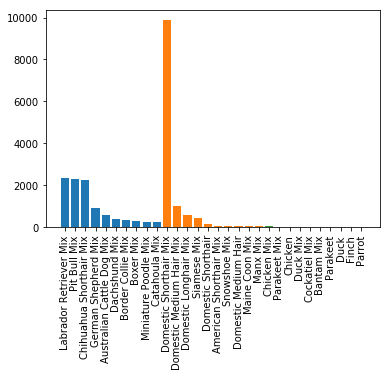

In [55]:
plt.xticks(rotation=90)
p1 = plt.bar(dog_top10["breed"], dog_top10["count"])
p2 = plt.bar(cat_top10["breed"], cat_top10["count"])
p3 = plt.bar(bird_top10["breed"], bird_top10["count"])
plt.show()

In [59]:
## Conclusion
##1. One of the best dog breed-Labrador Retriever Mix.  One of the best cat MixDomestic Shorthair Mix
##2. It is important for an animal to have an ID tag (I think that the shelter staff learned the names from the tags. The animals with unknown names have almost no chance to return to owners and have less chance to be adopted.